In [1]:
!pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [9]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
df = pd.read_csv("weather.csv")  

In [18]:
#Summary desription of the data

In [19]:
#THE FEW DATA
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [22]:
# the number of rows and columns of the file
df.shape

(8784, 8)

In [21]:
# THE SUMMARY STATISTICS OF THE DATA
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [23]:
# THE DATASET STRUCTURE AND DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [24]:
# HANDLE MISSING DATA
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [27]:
#DATA INSPECT AND CLEANING
# chek the columns
print(df.columns)

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


In [29]:
# convert data
df['Date/Time'] = pd.to_datetime(df['Date/Time'])  

In [30]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [33]:
# HANDLING OUTLIERS
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x21e87872710>,
 'caps': [<matplotlib.lines.Line2D at 0x21e87872990>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e8cfff610>],
 'medians': [<matplotlib.lines.Line2D at 0x21e87872c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e87872d50>],
 'means': []}

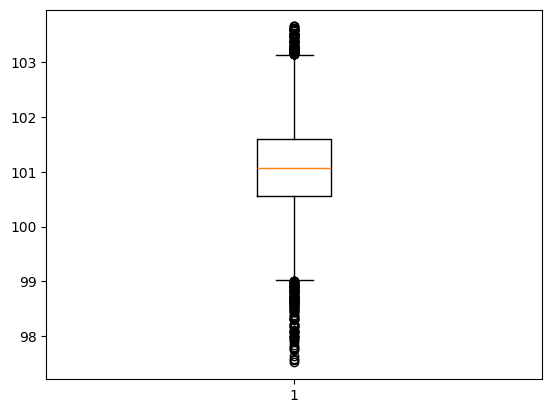

In [43]:
plt.boxplot(df[ 'Press_kPa' ]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x21e877f9810>,
 'caps': [<matplotlib.lines.Line2D at 0x21e877f9a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e877f96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21e877f9d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e877f9e50>],
 'means': []}

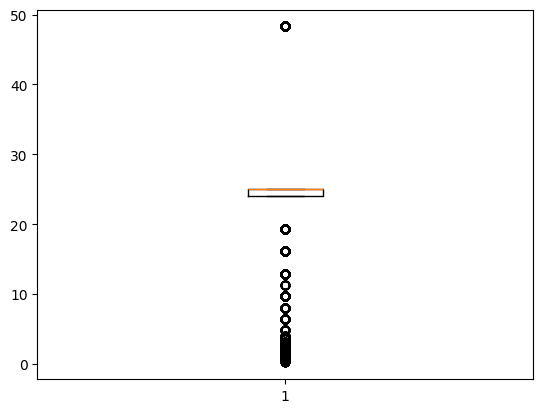

In [44]:
plt.boxplot(df[ 'Visibility_km' ]) 

{'whiskers': [<matplotlib.lines.Line2D at 0x21e8d0a8a50>,
 'caps': [<matplotlib.lines.Line2D at 0x21e8d0a8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e8d0a8910>],
 'medians': [<matplotlib.lines.Line2D at 0x21e8d0a8f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e8d0a9090>],
 'means': []}

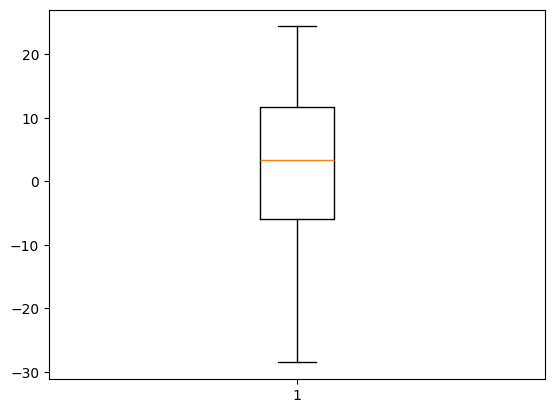

In [47]:
plt.boxplot(df[ 'Dew Point Temp_C' ]) 

<Axes: xlabel='Temp_C', ylabel='Count'>

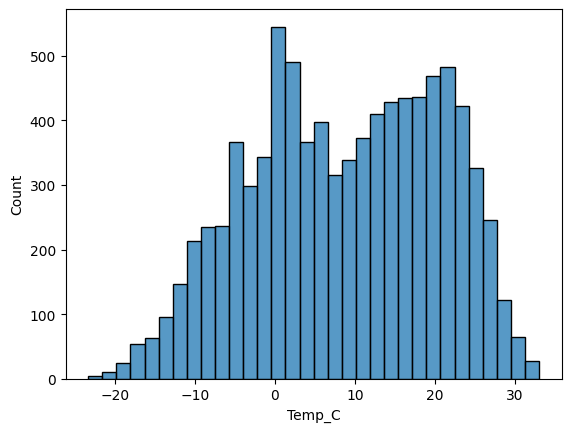

In [48]:
# DATA VISUALIZATION
sns.histplot(df['Temp_C'])

In [49]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [80]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert datetime to numeric
df['Date/Time_num'] = df['Date/Time'].astype('int64') / 10**9  # seconds

# Features and target
X = df[['Temp_C', 'Dew Point Temp_C','Press_kPa']]
y = df['Date/Time_num']

# Train model
regr = LinearRegression()
regr.fit(X, y)

# Predict for a new point
predicted_timestamp = regr.predict([[-2, -2, 202 ]])[0]

# Convert back to datetime
predicted_date_time = pd.to_datetime(predicted_timestamp, unit='s')
print(predicted_date_time)


2020-04-27 11:00:24.213503122


C:\Users\johnm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert datetime to numeric (seconds)
df['Date/Time_num'] = pd.to_datetime(df['Date/Time']).astype('int64') / 10**9

# Features and target
X = df[['Date/Time_num']]        # feature
y = df[['Press_kPa', 'Temp_C']]  # target (multi-output regression)

# Train model
regr = LinearRegression()
regr.fit(X, y)

# Predict for a new datetime
new_time = pd.to_datetime("2014-10-10 04:00:00")
new_time_num = new_time.value / 10**9  # convert to seconds

predicted_kPa_Temp_C = regr.predict([[new_time_num]])[0]

print("Predicted Press_kPa:", predicted_kPa_Temp_C[0])
print("Predicted Temp_C:", predicted_kPa_Temp_C[1])


Predicted Press_kPa: 101.51666485150878
Predicted Temp_C: 28.667881456722


C:\Users\johnm\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
